<a href="https://colab.research.google.com/github/Pranita1994/EDA-on-House-sales/blob/main/Applied_Statistics_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Businesses need to understand how customers buy things. Right now, they don't have all the information they need. They want to use numbers to learn more about what customers usually purchase and when. By doing this, they can make better choices about what to sell and how to make customers happier. This will help them earn more money and compete better with other companies.

🎯 **Objective**:

The objective of this project is to analyze customer buying habits using basic numbers and facts. By studying what customers usually buy and when, our goal is to help businesses make smarter decisions about their products and services. This analysis will aim to improve customer satisfaction, increase profits, and make the business more competitive in the market.

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





### Import libraries and necessory packages


In [1]:
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


### Loding Supermarket dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/Superstore.csv')
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.000,0,1,########,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.000,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.000,1,0,########,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.000,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [4]:
# Displaying the first few rows of the dataset
df. head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [5]:
# Checking the shape of the dataset
df.shape

(2240, 22)

In [6]:
# Checking the data types and not null count of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Statistical summary of the dataset
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.000,NaN,NaN,NaN,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
Year_Birth,2240.000,NaN,NaN,NaN,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.000,NaN,NaN,NaN,52247.251,25173.077,1730.000,35303.000,51381.500,68522.000,666666.000
Kidhome,2240.000,NaN,NaN,NaN,0.444,0.538,0.000,0.000,0.000,1.000,2.000
Teenhome,2240.000,NaN,NaN,NaN,0.506,0.545,0.000,0.000,0.000,1.000,2.000
Dt_Customer,2240,401,########,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.000,NaN,NaN,NaN,49.109,28.962,0.000,24.000,49.000,74.000,99.000
MntWines,2240.000,NaN,NaN,NaN,303.936,336.597,0.000,23.750,173.500,504.250,1493.000


### Observations:

*   Year_Birth has a large range of values i.e. 1893 to 1996.
*   The birth year <=1900 is some users.. It's very unlikely that the person is alive. It may be a reporting error. We will explore this further.

*   Income has a max value of 666666 which is far greater than the mean and could be an outlier.
*   Columns - Income, MntFruits, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts might have outliers on the right end as there is a large difference between 75th percentile and maximum values.

*   Recency has an approx equal mean and median which is equal to 49 days.
*   Highest mean amount spent per customer in the last two years is on wines (approx 304), followed by meat products (approx 167).

*  Dt_Customer has unknown and unrecognisable value '######'
*  




##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [8]:
# Checking for duplicates
df.duplicated().sum()

0

In [9]:
# Checking for missing values

round(df.isnull().sum() / df.isnull().count() * 100, 2)

Id                    0.000
Year_Birth            0.000
Education             0.000
Marital_Status        0.000
Income                1.070
Kidhome               0.000
Teenhome              0.000
Dt_Customer           0.000
Recency               0.000
MntWines              0.000
MntFruits             0.000
MntMeatProducts       0.000
MntFishProducts       0.000
MntSweetProducts      0.000
MntGoldProds          0.000
NumDealsPurchases     0.000
NumWebPurchases       0.000
NumCatalogPurchases   0.000
NumStorePurchases     0.000
NumWebVisitsMonth     0.000
Response              0.000
Complain              0.000
dtype: float64

In [10]:
data = df.copy()
# We can drop the column - Id as it is unique for each customer and will not add value to the model.
# Dropping column - Id
data.drop(columns=["Id"], inplace=True)


In [11]:
# Replace '########' with NaN (missing value)
data['Dt_Customer'] = data['Dt_Customer'].replace('########', pd.NA)

# Drop rows with NaN in the 'Dt_Customer' column
data = data.dropna(subset=['Dt_Customer'])

# Reset the index of the DataFrame
data = data.reset_index(drop=True)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1958,PhD,Single,71691.000,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,1,0
4,1954,2n Cycle,Married,63564.000,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1974,2n Cycle,Married,20130.000,0,0,3/17/2014,99,0,6,3,7,6,12,1,1,0,3,8,0,0
1320,1900,2n Cycle,Divorced,36640.000,1,0,9/26/2013,99,15,6,8,7,4,25,1,2,1,2,5,0,1
1321,1973,Graduation,Divorced,78901.000,0,1,9/17/2013,99,321,11,309,33,26,34,3,9,3,5,4,0,0
1322,1977,2n Cycle,Married,31056.000,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0


In [12]:
#converting to date time object
data.Dt_Customer = data.Dt_Customer.apply(lambda x : pd.to_datetime(str(x)))
data.Dt_Customer.describe()

count                    1324
unique                    400
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [13]:
# To calculate age we'll subtract the year 2021 because variables account for the last 2 years
# and we have customers registered till 2014 only
# We need to convert strings values to dates first to use subtraction
data["Age"] = 2021 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year)

data["Age"].sort_values()

1074     25
754      26
856      26
855      26
148      27
       ... 
861      78
1026     80
1320    121
485     122
297     128
Name: Age, Length: 1324, dtype: int64



*   We can see that there are few observations with ages greater than 100 which is highly unlikely to be true.

*  We can drop the observations with age greater than 100



In [14]:
data[data["Age"] > 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
297,1893,2n Cycle,Single,60182.000,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,128
485,1899,PhD,Together,83532.000,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,122
1320,1900,2n Cycle,Divorced,36640.000,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,1,121


The Year_Birth for these 3 observations seems to be incorrect
Replacing them with some other values might not be the best thing to do
We will drop these 3 observations

In [15]:
# Dropping the 3 observations with age > 100
data.drop(data[data["Age"] > 100].index, inplace=True)

In [16]:
# Extracting registration year from the date
data["Reg_year"] = data["Dt_Customer"].apply(lambda x: x.year)

# Extracting registration quarter from the date
data["Reg_quarter"] = data["Dt_Customer"].apply(lambda x: x.quarter)

# Extracting registration month from the date
data["Reg_month"] = data["Dt_Customer"].apply(lambda x: x.month)

# Extracting registration week from the date
data["Reg_week"] = data["Dt_Customer"].apply(lambda x: x.day // 7)

In [17]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week
0,1970,Graduation,Divorced,84835.000,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,51,2014,2,6,2
1,1961,Graduation,Single,57091.000,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,60,2014,2,6,2
2,1958,Graduation,Married,67267.000,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,63,2014,2,5,1
3,1958,PhD,Single,71691.000,0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,1,0,63,2014,1,3,2
4,1954,2n Cycle,Married,63564.000,0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,67,2014,1,1,4


In [18]:
#Let's check the count of each unique category in each of the categorical variables.

# Making a list of all categorical variables
cat_col = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Response",
    "Reg_year",
    "Reg_quarter",
    "Reg_month",
    "Reg_week",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Graduation    686
PhD           272
Master        224
2n Cycle      103
Basic          36
Name: Education, dtype: int64
----------------------------------------
Married     505
Together    342
Single      284
Divorced    150
Widow        36
YOLO          2
Alone         1
Absurd        1
Name: Marital_Status, dtype: int64
----------------------------------------
0    765
1    532
2     24
Name: Kidhome, dtype: int64
----------------------------------------
0    687
1    604
2     30
Name: Teenhome, dtype: int64
----------------------------------------
0    1310
1      11
Name: Complain, dtype: int64
----------------------------------------
0    1121
1     200
Name: Response, dtype: int64
----------------------------------------
2013    702
2014    336
2012    283
Name: Reg_year, dtype: int64
----------------------------------------
1    353
2    334
4    331
3    303
Name: Reg_quarter, dtype: int64
----------------------------------------
8     140
10    130
3     127
1     117
5     1








*   In education, 2n cycle and Master means the same thing. We can combine these two categories.

*  There are many categories in marital status. We can combine the categories 'Alone', 'Absurd' and 'YOLO' with 'Single' and 'Together' categories with 'Married'.
*   There are only 11 customers who complained in the last two years.


*  In 'Response' we have 1121 observations for the 0 class but only 200 observations for class 1.

*   There are only three years in the customer registration data.



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [19]:
# Replacing 2n Cycle with Master
data["Education"] = data["Education"].replace("2n Cycle", "Master")

In [20]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
data["Marital_Status"] = data["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
data["Marital_Status"] = data["Marital_Status"].replace(["Together"], "Married")

In [21]:
# We can add a column - total amount spent by each customer in the last 2 years

data["Total_Amount_Spent"] = data[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

In [22]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
0,1970,Graduation,Divorced,84835.000,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,51,2014,2,6,2,1190
1,1961,Graduation,Single,57091.000,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,60,2014,2,6,2,577
2,1958,Graduation,Married,67267.000,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,63,2014,2,5,1,251
3,1958,PhD,Single,71691.000,0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,1,0,63,2014,1,3,2,1192
4,1954,Master,Married,63564.000,0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,67,2014,1,1,4,1215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1974,Master,Married,20130.000,0,0,2014-03-17,99,0,6,3,7,6,12,1,1,0,3,8,0,0,47,2014,1,3,2,34
1319,1974,Master,Married,20130.000,0,0,2014-03-17,99,0,6,3,7,6,12,1,1,0,3,8,0,0,47,2014,1,3,2,34
1321,1973,Graduation,Divorced,78901.000,0,1,2013-09-17,99,321,11,309,33,26,34,3,9,3,5,4,0,0,48,2013,3,9,2,734
1322,1977,Master,Married,31056.000,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,44,2013,1,1,3,55


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [23]:
selected_variables = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the statistics
statistics = {
    'Variable': selected_variables,
    'Mean': data[selected_variables].mean(),
    'Median': data[selected_variables].median(),
    'Mode': data[selected_variables].mode().iloc[0],  # Select first mode if multiple modes
    'Variance': data[selected_variables].var(),
    'Std Deviation': data[selected_variables].std()
}

# Print the statistics
print(pd.DataFrame(statistics))

                          Variable      Mean    Median     Mode      Variance  \
Income                      Income 51409.820 50442.000 7500.000 439322968.656   
MntWines                  MntWines   302.061   171.000    2.000    114485.827   
MntFruits                MntFruits    25.162     7.000    0.000      1480.933   
MntMeatProducts    MntMeatProducts   162.111    66.000   11.000     48001.679   
MntFishProducts    MntFishProducts    36.479    11.000    0.000      2964.116   
MntSweetProducts  MntSweetProducts    27.111     8.000    0.000      1724.241   
MntGoldProds          MntGoldProds    44.017    24.000    1.000      2765.546   

                  Std Deviation  
Income                20960.033  
MntWines                338.358  
MntFruits                38.483  
MntMeatProducts         219.093  
MntFishProducts          54.444  
MntSweetProducts         41.524  
MntGoldProds             52.588  


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [24]:
# Select the relevant numeric columns
numeric_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
numeric_data = data[numeric_columns]

# Calculate basic descriptive statistics
descriptive_stats = numeric_data.describe()

# Calculate additional statistics
median = numeric_data.median()
variance = numeric_data.var()
std_deviation = numeric_data.std()
range_ = numeric_data.max() - numeric_data.min()
interquartile_range = descriptive_stats.loc['75%'] - descriptive_stats.loc['25%']

# Detect and handle outliers (e.g., using IQR method)
lower_bound = descriptive_stats.loc['25%'] - 1.5 * interquartile_range
upper_bound = descriptive_stats.loc['75%'] + 1.5 * interquartile_range

# Find potential outliers
potential_outliers = (numeric_data < lower_bound) | (numeric_data > upper_bound)

# Display the results
print("Descriptive Statistics:")
print(descriptive_stats)

print("\nMedian:")
print(median)

print("\nVariance:")
print(variance)

print("\nStandard Deviation:")
print(std_deviation)

print("\nRange:")
print(range_)

print("\nInterquartile Range:")
print(interquartile_range)

print("\nPotential Outliers:")
print(potential_outliers.sum())

Descriptive Statistics:
          Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count   1308.000  1321.000   1321.000         1321.000         1321.000   
mean   51409.820   302.061     25.162          162.111           36.479   
std    20960.033   338.358     38.483          219.093           54.444   
min     1730.000     0.000      0.000            0.000            0.000   
25%    35434.750    23.000      1.000           15.000            2.000   
50%    50442.000   171.000      7.000           66.000           11.000   
75%    68179.500   494.000     31.000          217.000           46.000   
max   157146.000  1492.000    197.000         1725.000          253.000   

       MntSweetProducts  MntGoldProds  
count          1321.000      1321.000  
mean             27.111        44.017  
std              41.524        52.588  
min               0.000         0.000  
25%               1.000         9.000  
50%               8.000        24.000  
75%              33.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [25]:
n = len(data['Response'])  # Total number of trials (sample size)
k = sum(data['Response'])   # Number of successes (responses)
p = k / n                   # Probability of success (response)

# Calculate the probability of receiving a response
from math import comb
probability = comb(n, k) * (p**k) * ((1-p)**(n-k))

# Calculate the expected value
expected_value = n * p

print(f"Probability of a response: {probability:.4f}")
print(f"Expected number of responses: {expected_value:.2f}")


Probability of a response: 0.0306
Expected number of responses: 200.00


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  



*  The data for 'Income' is continuous and appears to have a wide range of values.





In [26]:
from scipy.stats import norm

# Parameters estimated from your data
mean_income = 51409.82
std_dev_income = 20960.03

# Define the range [a, b]
a = 40000
b = 60000

# Calculate the probability that income falls within the range [a, b]
probability = norm.cdf(b, loc=mean_income, scale=std_dev_income) - norm.cdf(a, loc=mean_income, scale=std_dev_income)

print(f"Probability (Income between {a} and {b}): {probability:.4f}")


Probability (Income between 40000 and 60000): 0.3659


In [27]:
#  Probability that spending on wines falls within a certain range.
from scipy.stats import norm

# Parameters from your data
mean = 302.06
std_dev = 338.36

# Define the range [a, b]
a = 100
b = 400

# Calculate the probability
probability = norm.cdf(b, loc=mean, scale=std_dev) - norm.cdf(a, loc=mean, scale=std_dev)

print(f"Probability (Spending on wines between {a} and {b}): {probability:.4f}")


Probability (Spending on wines between 100 and 400): 0.3387


In [28]:
# calculate the probability that spending on fruits falls within a certain range using the mean, variance, and standard deviation

# Parameters from data
mean = 25.16
std_dev = 38.48

# Define the range [a, b]
a = 10
b = 50

# Calculate the probability
probability = norm.cdf(b, loc=mean, scale=std_dev) - norm.cdf(a, loc=mean, scale=std_dev)

print(f"Probability (Spending on fruits between {a} and {b}): {probability:.4f}")


Probability (Spending on fruits between 10 and 50): 0.3939


In [29]:
# calculate the probability that spending on meat products falls within a certain range

# Parameters from data
mean =  162.11
std_dev = 219.09

# Define the range [a, b]
a = 100
b = 300

# Calculate the probability
probability = norm.cdf(b, loc=mean, scale=std_dev) - norm.cdf(a, loc=mean, scale=std_dev)

print(f"Probability (Spending on meat between {a} and {b}): {probability:.4f}")


Probability (Spending on meat between 100 and 300): 0.3470


In [30]:
# The distribution of spending on fish products

mean =  36.48
std_dev = 54.44

# Define the range [a, b]
a = 20
b = 70

# Calculate the probability
probability = norm.cdf(b, loc=mean, scale=std_dev) - norm.cdf(a, loc=mean, scale=std_dev)

print(f"Probability (Spending on fish between {a} and {b}): {probability:.4f}")


Probability (Spending on fish between 20 and 70): 0.3499


In [31]:
# The distribution of spending on sweet products

mean =   27.11
std_dev =  41.52

# Define the range [a, b]
a = 20
b = 60

# Calculate the probability
probability = norm.cdf(b, loc=mean, scale=std_dev) - norm.cdf(a, loc=mean, scale=std_dev)

print(f"Probability (Spending on sweet between {a} and {b}): {probability:.4f}")


Probability (Spending on sweet between 20 and 60): 0.3538


In [32]:
# The distribution of spending on gold products

mean = 44.02
std_dev = 52.59

# Define the range [a, b]
a = 30
b = 80

# Calculate the probability
probability = norm.cdf(b, loc=mean, scale=std_dev) - norm.cdf(a, loc=mean, scale=std_dev)

print(f"Probability (Spending on gold between {a} and {b}): {probability:.4f}")


Probability (Spending on gold between 30 and 80): 0.3582


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**


*  Probability (Income between 40000 and 60000): 0.3659
*  Probability (Spending on wines between 100 and 400): 0.3387
*  Probability (Spending on fruits between 10 and 50): 0.3939
*  Probability (Spending on fish between 20 and 70): 0.3499
*  Probability (Spending on sweet between 20 and 60): 0.3538
*  Probability (Spending on gold between 30 and 80): 0.3582






In [33]:
from sklearn.impute import SimpleImputer

# Select the features for clustering
X = data[['Income', 'MntWines'] ]

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

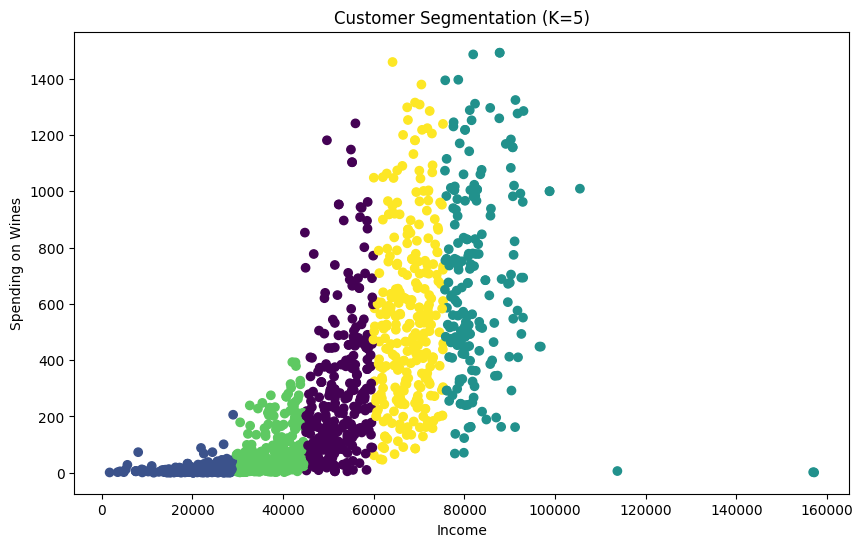

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters (K)
k = 5
# Fit K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Segment'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=data['Segment'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending on Wines')
plt.title(f'Customer Segmentation (K={k})')
plt.show()

# Display the first few rows of the DataFrame with the 'Segment' column added
print(data.head())


**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

   Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced 84835.000        0         0   
1        1961  Graduation         Single 57091.000        0         0   
2        1958  Graduation        Married 67267.000        0         1   
3        1958         PhD         Single 71691.000        0         0   
4        1954      Master        Married 63564.000        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2014-06-16        0       189        104              379              111   
1  2014-06-15        0       464          5               64                7   
2  2014-05-13        0       134         11               59               15   
3  2014-03-17        0       336        130              411              240   
4  2014-01-29        0       769         80              252               15   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0

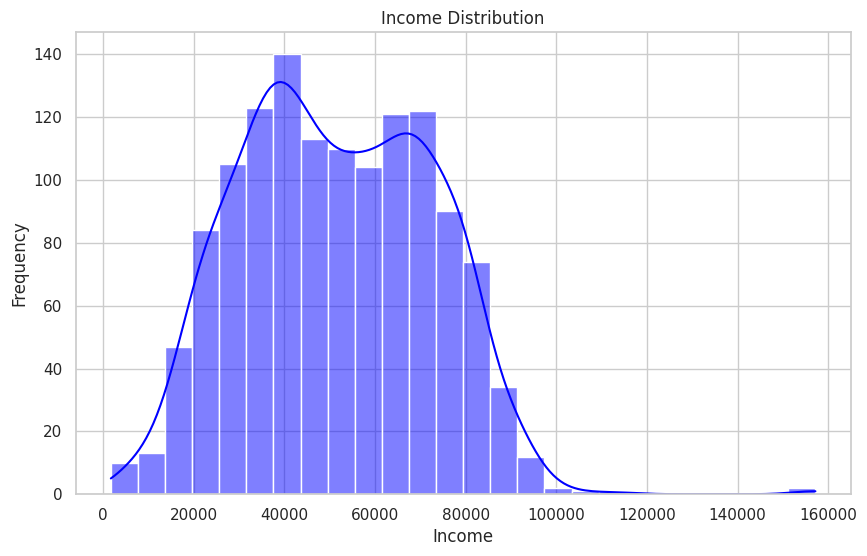

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style of the plot

# Create the histogram
sns.histplot(data['Income'], kde=True, color='blue')

# Customize the plot
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()


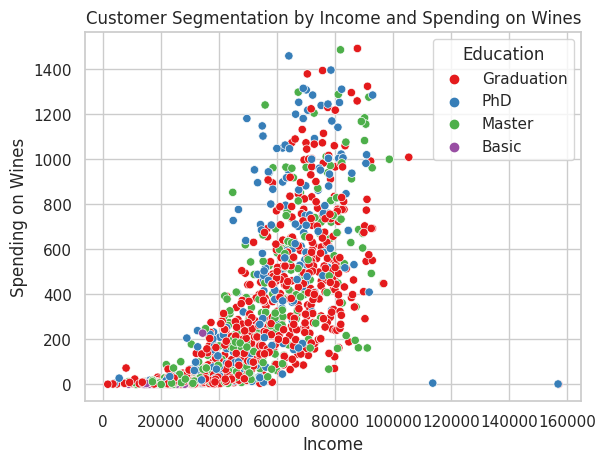

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've performed customer segmentation and have a 'Segment' column
sns.scatterplot(data=data, x='Income', y='MntWines', hue='Education', palette='Set1')
plt.title('Customer Segmentation by Income and Spending on Wines')
plt.xlabel('Income')
plt.ylabel('Spending on Wines')
plt.show()



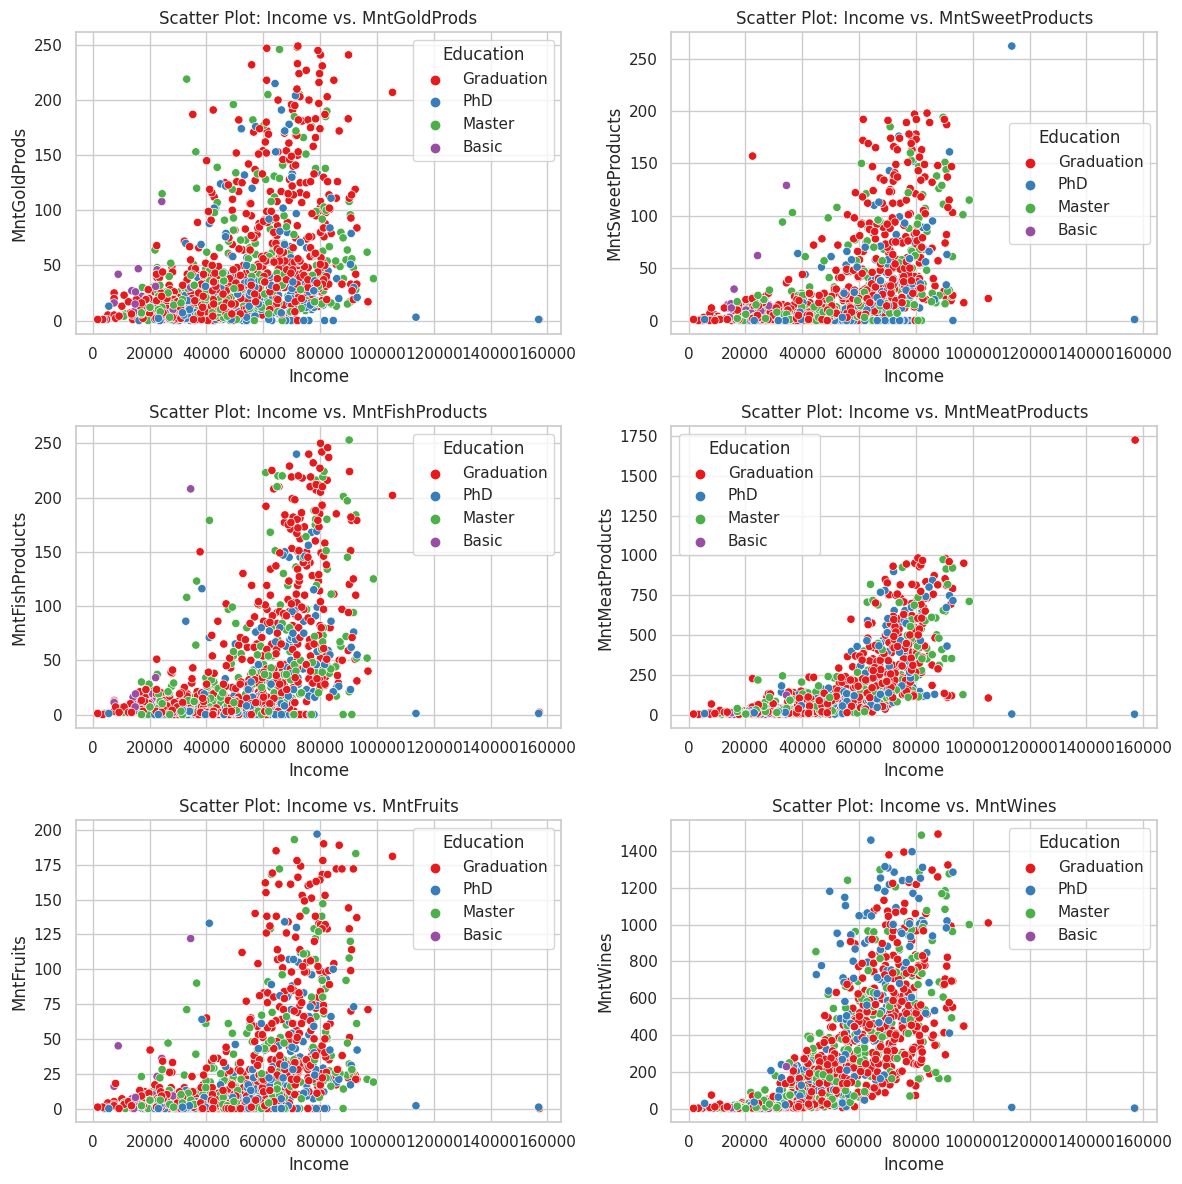

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've performed customer segmentation and have a 'Segment' column
product_categories = ['MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits','MntWines']

# Create subplots for each product category
num_subplots = len(product_categories)

# Set up the subplots with multiple rows and columns
num_cols = 2  # Number of columns in each row
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set a common color palette
colors = sns.color_palette('Set1', n_colors=len(data['Segment'].unique()))

# Loop through product categories and create a scatter plot for each
for i, category in enumerate(product_categories):
    # Create a scatter plot for the current product category
    sns.scatterplot(data=data, x='Income', y=category,hue = 'Education', palette='Set1', ax=axes[i])
    axes[i].set_title(f'Scatter Plot: Income vs. {category}')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(category)

# Remove any empty subplots if the number of categories is not a multiple of num_cols
for i in range(num_subplots, num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()



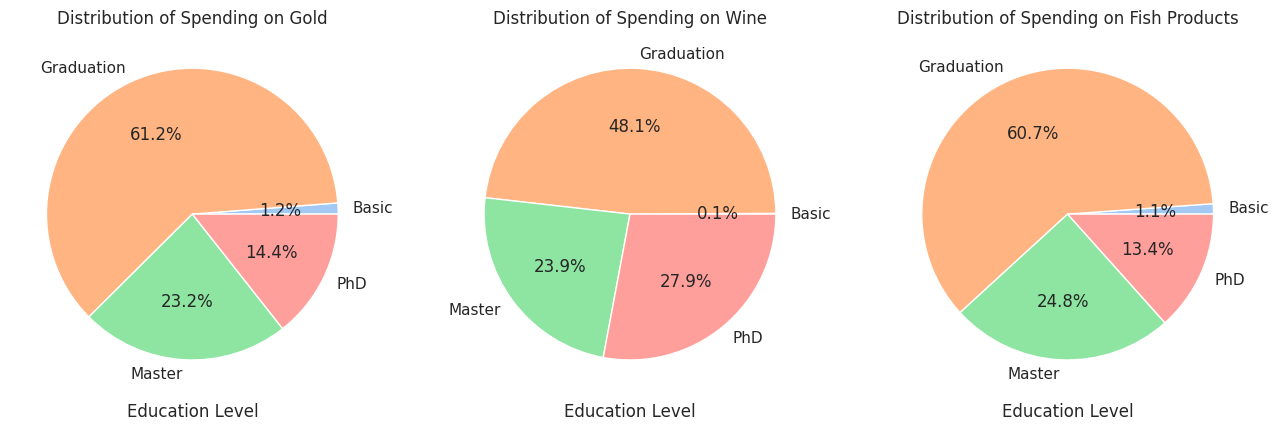

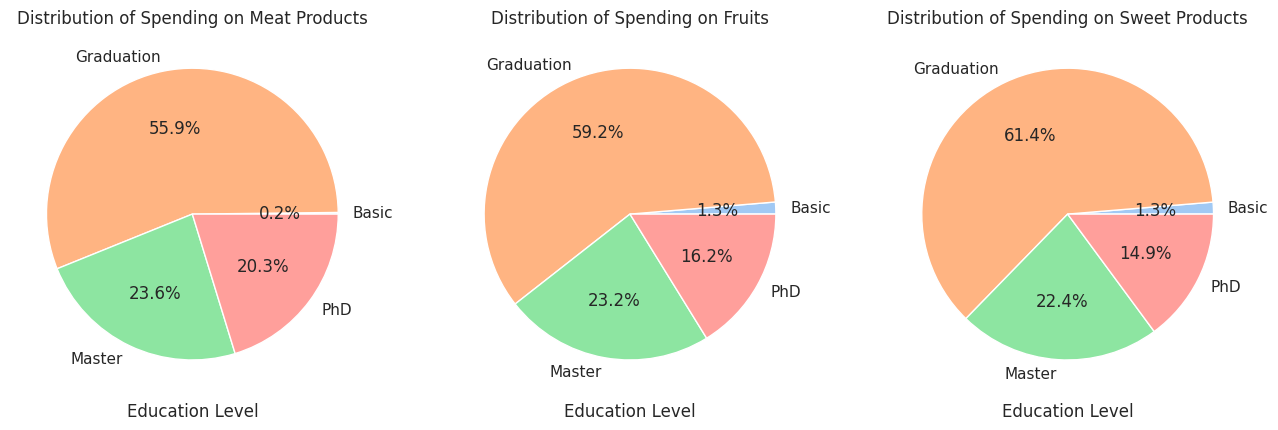

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

data = data # Replace 'df' with your DataFrame

# Group the data by 'Education' and calculate the total spending on 'MntGoldProds'
education_spending1 = data.groupby('Education')['MntGoldProds'].sum()
education_spending2 = data.groupby('Education')['MntWines'].sum()
education_spending3 = data.groupby('Education')['MntFishProducts'].sum()
education_spending4 = data.groupby('Education')['MntMeatProducts'].sum()
education_spending5 = data.groupby('Education')['MntFruits'].sum()
education_spending6 = data.groupby('Education')['MntSweetProducts'].sum()

# Set up the pie chart

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
palette_color = sns.color_palette('pastel')
plt.pie(education_spending1, labels=education_spending1.index, autopct='%1.1f%%', colors=palette_color)

plt.title('Distribution of Spending on Gold')
plt.xlabel('Education Level')
plt.ylabel('')

plt.subplot(1,3,2)
palette_color = sns.color_palette('pastel')
plt.pie(education_spending2, labels=education_spending2.index, autopct='%1.1f%%', colors=palette_color)

plt.title('Distribution of Spending on Wine')
plt.xlabel('Education Level')
plt.ylabel('')

plt.subplot(1,3,3)
palette_color = sns.color_palette('pastel')
plt.pie(education_spending3, labels=education_spending3.index, autopct='%1.1f%%', colors=palette_color)

plt.title('Distribution of Spending on Fish Products')
plt.xlabel('Education Level')
plt.ylabel('')

plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
palette_color = sns.color_palette('pastel')
plt.pie(education_spending4, labels=education_spending4.index, autopct='%1.1f%%', colors=palette_color)

plt.title('Distribution of Spending on Meat Products')
plt.xlabel('Education Level')
plt.ylabel('')


plt.subplot(1,3,2)
palette_color = sns.color_palette('pastel')
plt.pie(education_spending5, labels=education_spending5.index, autopct='%1.1f%%', colors=palette_color)

plt.title('Distribution of Spending on Fruits')
plt.xlabel('Education Level')
plt.ylabel('')

plt.subplot(1,3,3)
palette_color = sns.color_palette('pastel')
plt.pie(education_spending6, labels=education_spending6.index, autopct='%1.1f%%', colors=palette_color)

plt.title('Distribution of Spending on Sweet Products')
plt.xlabel('Education Level')
plt.ylabel('')


# Show the pie chart
plt.show()


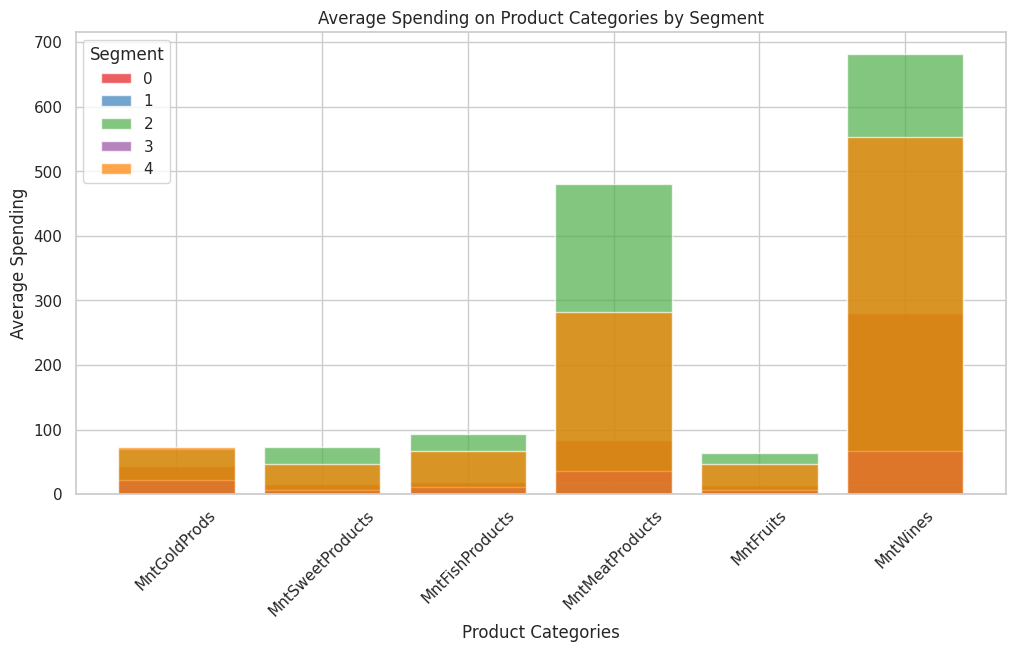

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Segment' and calculate the mean spending for each product category
segment_means = data.groupby('Segment')[['MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits','MntWines']].mean()

# Transpose the data for easy plotting
segment_means = segment_means.T

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")  # Choose a color palette

# Create bar plots for each product category
for segment in segment_means.columns:
    plt.bar(segment_means.index, segment_means[segment], label=segment, alpha=0.7)

# Customize the plot
plt.title('Average Spending on Product Categories by Segment')
plt.xlabel('Product Categories')
plt.ylabel('Average Spending')
plt.legend(title='Segment')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()



*   Total amount spent has decreased over the years, which shows that either the quality of products has declined or the company lacks marketing strategies
The company should constantly improve its marketing strategies to address such issues
*  Our analysis showed that ~99% of customers had no complaints in the last two years, which can be due to the lack of feedback options for customers
The company should create easy mechanisms to gather feedback from the customers and use it to identify major concerns if any
*   The company should target customers who buy premium products - gold products or high-quality wines - as these customers can spend more and are more likely to purchase the offer
*  The company should further launch premium offers for such customers
Such offers can also be extended to customers with higher income
*  The number of web visits is an important feature and the company should work on customizing its website to direct more traffic to the website
*  The company can improve the interface and provide easy check-in, check-out, and delivery options
*   Customers who are frequent buyers should be targeted more by the company and offered added benefits




